In [1]:
from fromscratchtoml.statistics import Statistics
from fromscratchtoml.toolbox import binary_visualize
import torch as ch

%matplotlib inline

In [2]:
n = 5
n_dim = 3
n_comp = n_dim

X = ch.zeros(n, n_dim)
if n_dim==3:
    m = 5
    c = 2
    d = 1
    for i in range(n):
        X[i,0] = i
        X[i,1] = m*i + c
        X[i,2] = d - X[i,0] - X[i,1]

elif n_dim==2:
    for i in range(n):
        X[i,0] = i
        X[i,1] = 2*i

print(X)


  0   2  -1
  1   7  -7
  2  12 -13
  3  17 -19
  4  22 -25
[torch.FloatTensor of size 5x3]



In [3]:
r_x, evals, evecs = Statistics.pca(X, num_components=n_comp)

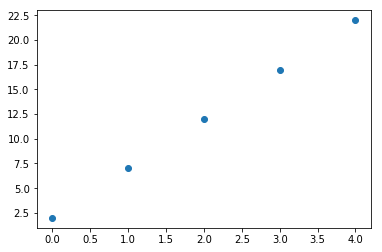

In [4]:
binary_visualize(X)

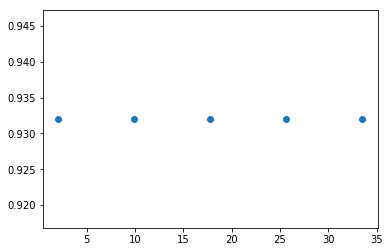

In [5]:
binary_visualize(ch.stack((r_x[...,0], r_x[...,1]), 1))

In [6]:
# binary_visualize(ch.stack((r_x[...,0], r_x[...,2]), 1))

In [7]:
# binary_visualize(ch.stack((r_x[...,1], r_x[...,2]), 1))

In [8]:
X = X.numpy()

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
pca = PCA(n_components=n_comp)
pca.fit(X- X.mean(axis=0))
# print(pca.fit_transform(X - X.mean(axis=0)))
# print(pca.fit_transform(X))
skl_x = pca.transform(X)
print(skl_x)

[[  2.03200197  -0.66512853  -0.65465367]
 [  9.90600967  -0.66512775  -0.65465355]
 [ 17.78001595  -0.6651268   -0.65465355]
 [ 25.65402222  -0.66512585  -0.65465355]
 [ 33.5280304   -0.66512394  -0.65465355]]


In [10]:
r_x


  2.0320   0.9320   0.2602
  9.9060   0.9320   0.2602
 17.7800   0.9320   0.2602
 25.6540   0.9320   0.2602
 33.5280   0.9320   0.2602
[torch.FloatTensor of size 5x3]

In [20]:
Xhat = np.dot(skl_x, pca.components_)
Xhatp = np.dot(r_x, evecs) #- np.mean(X, axis=0)
print(Xhat)
print("")
print(Xhatp)

[[ -1.19209290e-07   1.99999964e+00  -9.99999821e-01]
 [  9.99999762e-01   6.99999952e+00  -6.99999905e+00]
 [  1.99999917e+00   1.19999971e+01  -1.29999962e+01]
 [  2.99999857e+00   1.69999981e+01  -1.89999943e+01]
 [  3.99999762e+00   2.19999962e+01  -2.49999962e+01]]

[[ -0.21144447   2.02581477  -1.01372838]
 [  0.7885555    7.02581501  -7.01372766]
 [  1.78855562  12.02581501 -13.01372814]
 [  2.78855586  17.02581406 -19.0137291 ]
 [  3.78855538  22.02581406 -25.0137291 ]]


In [12]:
X

array([[  0.,   2.,  -1.],
       [  1.,   7.,  -7.],
       [  2.,  12., -13.],
       [  3.,  17., -19.],
       [  4.,  22., -25.]], dtype=float32)

In [13]:
evecs


 0.1270  0.6350 -0.7620
-0.2269  0.7665  0.6009
-0.9919  0.0813 -0.0976
[torch.FloatTensor of size 3x3]

In [14]:
pca.components_

array([[ 0.12700014,  0.63500065, -0.76200062],
       [-0.47113284, -0.63741499, -0.60970145],
       [ 0.87287152, -0.43643579, -0.21821791]], dtype=float32)

In [15]:
Statistics.cov_matrix(ch.Tensor(X), ch.Tensor(X))


  2.5000  12.5000 -15.0000
 12.5000  62.5000 -75.0000
-15.0000 -75.0000  90.0000
[torch.FloatTensor of size 3x3]

In [16]:
pca.get_covariance()

array([[  2.5       ,  12.49999905, -14.99999619],
       [ 12.5       ,  62.49999237, -74.99997711],
       [-14.99999714, -74.99997711,  89.99995422]], dtype=float32)